In [11]:
import numpy as np
import pandas as pd

In [2]:
raw_data = pd.read_csv('data/fake_job_postings.csv')

In [6]:
raw_data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [10]:
raw_data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data = raw_data.drop('job_id', axis=1)

In [20]:
long_to_plot = pd.melt(data.select_dtypes(include=np.number), id_vars='fraudulent')
long_to_plot

,fraudulent,variable,value
0,0,telecommuting,0
1,0,telecommuting,0
2,0,telecommuting,0
3,0,telecommuting,0
4,0,telecommuting,0
...,...,...,...
53635,0,has_questions,1
53636,0,has_questions,1
53637,0,has_questions,0
53638,0,has_questions,1


In [19]:
from plotnine import *

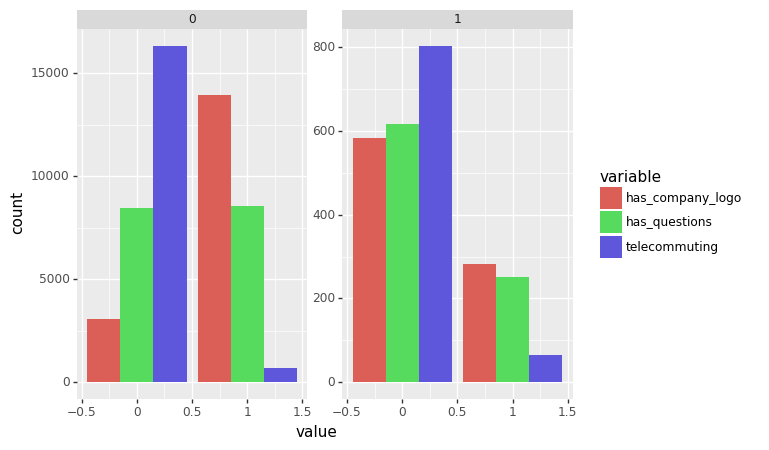

<ggplot: (123790729244)>

In [33]:
ggplot(long_to_plot, aes(fill='variable', x='value')) + \
    geom_bar(position='dodge') + \
    facet_wrap('~fraudulent', scales='free') + \
    theme(subplots_adjust={'wspace': 0.15})

Fill NaN values with an empty string for text data

In [36]:
data[['company_profile', 'description', 'requirements', 'benefits']] = data[['company_profile', 'description', 'requirements', 'benefits']].fillna('')

Count number of words in text columns

In [47]:
text_col_names = ['company_profile', 'description', 'requirements', 'benefits']
for i in text_col_names:
    data['word_count_' + i] = data[i].apply(lambda x: len(x.split()))

In [57]:
word_count_col_names = ('word_count_' + ' word_count_'.join(['company_profile', 'description', 'requirements', 'benefits'])).split()

In [62]:
long_to_plot2 = pd.melt(data, id_vars='fraudulent', value_vars=word_count_col_names)
long_to_plot2

,fraudulent,variable,value
0,0,word_count_company_profile,141
1,0,word_count_company_profile,153
2,0,word_count_company_profile,141
3,0,word_count_company_profile,85
4,0,word_count_company_profile,207
...,...,...,...
71515,0,word_count_benefits,161
71516,0,word_count_benefits,54
71517,0,word_count_benefits,0
71518,0,word_count_benefits,35


In [73]:
(long_to_plot2.value == 0).sum()

13225

Calculating quantiles for the outliers

In [87]:
upper_q = long_to_plot2.value.quantile(0.99)
lower_q = long_to_plot2.value.quantile(0.01)
(lower_q, upper_q)

(0.0, 455.8099999999977)

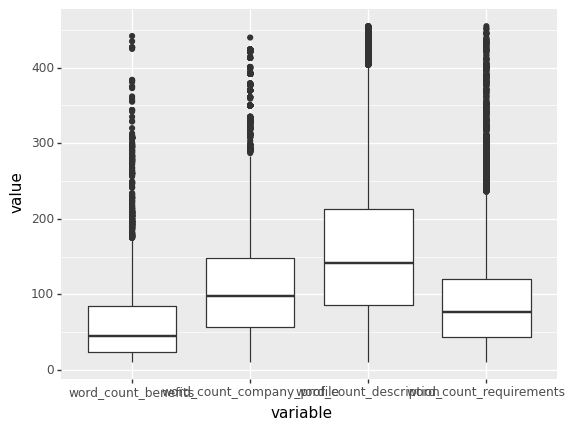

<ggplot: (123798339017)>

In [90]:
ggplot(long_to_plot2.query('@upper_q >= value >= 10')) + \
    geom_boxplot(aes(x='variable', y='value'))

C:\Users\dmika\Anaconda3\envs\UniversityEnv\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 80'. Pick better value with 'binwidth'.


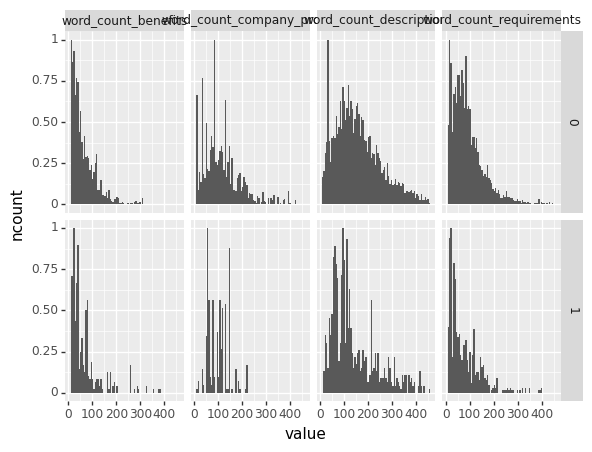

<ggplot: (123798210551)>

In [94]:
ggplot(long_to_plot2.query('@upper_q >= value >= 10')) + \
    geom_histogram(aes(x='value', y=after_stat('ncount'))) + \
    facet_grid('fraudulent~variable')